In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from datetime import date
from datetime import datetime

In [3]:
train = pd.read_csv('Dataset/train.csv') 
train.head()

,年,月,日,當地氣壓,海平面氣壓,最大降水量,一小時降水量,10分鐘降水量,平均氣溫,最高氣溫,最低氣溫,平均濕度,最小濕度,日照時間,開花日
0,1961,1,1,1011.7,1012.4,0.0,0.0,0.0,2.1,7.9,-3.9,41.0,15.0,8.6,0
1,1961,1,2,1020.2,1021.0,0.0,0.0,0.0,1.5,9.2,-3.3,51.0,26.0,8.7,0
2,1961,1,3,1021.3,1022.1,0.1,0.8,0.0,2.5,7.3,-2.4,58.0,37.0,5.4,0
3,1961,1,4,1004.6,1005.3,20.2,13.9,3.2,4.7,11.5,0.6,60.0,38.0,1.0,0
4,1961,1,5,1016.3,1017.0,0.0,0.0,0.0,3.8,7.7,1.4,33.0,19.0,8.3,0


### 紀錄訓練集中的各個年份，從每年 2月1日 起累積的最高氣溫平均值到開花日當天

In [5]:
years = train['年'].unique()

year_to_total_maxtemp = {}

for year in years:
    # 找這一年的2月1日
    start_row = train[(train['年'] == year) & (train['月'] == 2) & (train['日'] == 1)]
    if start_row.empty:
        continue
    start_idx = start_row.index[0]
    
    # 找這一年的開花日 (取最早一筆bloom==1的記錄)
    bloom_rows = train[(train['年'] == year) & (train['開花日'] == 1)].sort_values(['月', '日'])
    if bloom_rows.empty:
        continue
    
    bloom_month = int(bloom_rows.iloc[0]['月'])
    bloom_day = int(bloom_rows.iloc[0]['日'])
    bloom_idx = bloom_rows.index[0]
    
    # 累積2月1日到開花日的最高溫
    cumulative_max_temp = train.loc[start_idx:bloom_idx, '最高氣溫'].sum()
    
    # 存起來
    year_to_total_maxtemp[year] = (cumulative_max_temp, bloom_month, bloom_day)

# 最後漂亮印出來
for year, (total_temp, bloom_month, bloom_day) in year_to_total_maxtemp.items():
    print(f"{year}年的2月1日到{bloom_month}月{bloom_day}日開花前，累積最高氣溫總和是：{total_temp:.2f}度")

1961年的2月1日到4月1日開花前，累積最高氣溫總和是：721.00度
1962年的2月1日到4月1日開花前，累積最高氣溫總和是：768.10度
1963年的2月1日到4月1日開花前，累積最高氣溫總和是：701.70度
1964年的2月1日到4月2日開花前，累積最高氣溫總和是：676.60度
1965年的2月1日到4月2日開花前，累積最高氣溫總和是：642.20度
1966年的2月1日到3月20日開花前，累積最高氣溫總和是：607.60度
1967年的2月1日到3月30日開花前，累積最高氣溫總和是：660.80度
1968年的2月1日到3月29日開花前，累積最高氣溫總和是：654.60度
1969年的2月1日到4月6日開花前，累積最高氣溫總和是：724.00度
1970年的2月1日到4月7日開花前，累積最高氣溫總和是：696.30度
1971年的2月1日到3月30日開花前，累積最高氣溫總和是：663.40度
1972年的2月1日到3月28日開花前，累積最高氣溫總和是：610.40度
1973年的2月1日到3月31日開花前，累積最高氣溫總和是：705.30度
1974年的2月1日到4月2日開花前，累積最高氣溫總和是：658.00度
1975年的2月1日到3月29日開花前，累積最高氣溫總和是：607.90度
1976年的2月1日到3月22日開花前，累積最高氣溫總和是：596.70度
1977年的2月1日到3月22日開花前，累積最高氣溫總和是：556.70度
1978年的2月1日到3月31日開花前，累積最高氣溫總和是：640.10度
1979年的2月1日到3月23日開花前，累積最高氣溫總和是：631.80度
1980年的2月1日到3月31日開花前，累積最高氣溫總和是：640.60度
1981年的2月1日到3月26日開花前，累積最高氣溫總和是：600.10度
1982年的2月1日到3月23日開花前，累積最高氣溫總和是：581.50度
1983年的2月1日到3月31日開花前，累積最高氣溫總和是：662.50度
1984年的2月1日到4月11日開花前，累積最高氣溫總和是：643.70度
1985年的2月1日到4月3日開花前，累積最高氣溫總和是：677.80度
1986年的2月1日到4月3日開花前，累積最高氣溫總和是：627.50度
1987年的2月1日到3月23日開花前，累積

### 將結果資料視覺化

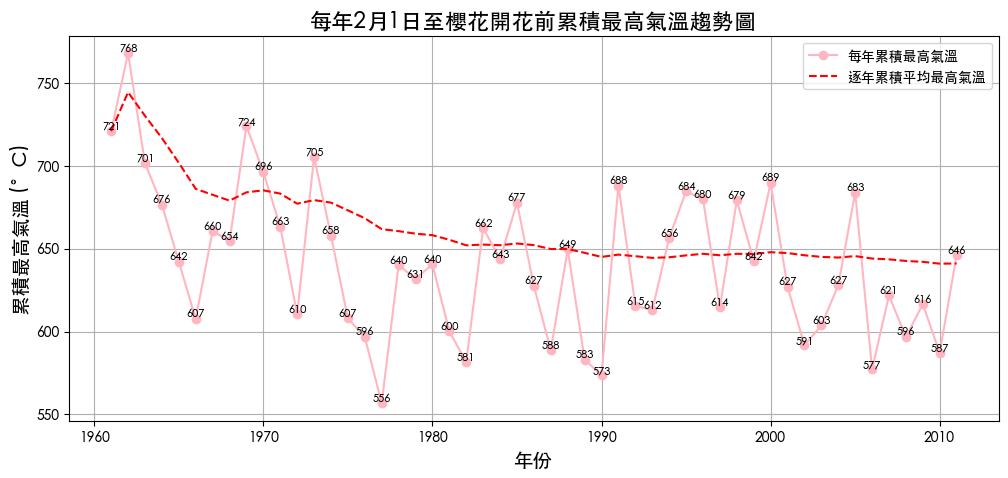

In [7]:
# 取得年份和每年累積最高氣溫
years = list(year_to_total_maxtemp.keys())
cumulative_max_temps = [total_temp for (total_temp, _, _) in year_to_total_maxtemp.values()]

# 計算平均累積最高氣溫（總平均）
average_cumulative_max_temp = sum(cumulative_max_temps) / len(cumulative_max_temps)

# 計算逐年累積平均最高氣溫（動態）
cumulative_averages = []
adding = 0
for idx, temp in enumerate(cumulative_max_temps):
    adding += temp
    cumulative_avg = adding / (idx + 1)
    cumulative_averages.append(cumulative_avg)

# 開始畫圖
plt.figure(figsize=(12, 5))
plt.rcParams['font.family'] = 'Heiti TC'

# 畫每年的點線圖
plt.plot(years, cumulative_max_temps, marker='o', color='lightpink', label='每年累積最高氣溫')

# 畫逐年累積平均趨勢線
plt.plot(years, cumulative_averages, linestyle='--', color='red', label='逐年累積平均最高氣溫')

# 設定標題和標籤
plt.title('每年2月1日至櫻花開花前累積最高氣溫趨勢圖', fontsize=16)
plt.xlabel('年份', fontsize=14)
plt.ylabel('累積最高氣溫 (°C)', fontsize=14)

# 顯示圖例
plt.legend()

# 顯示圖表
plt.grid(True)

for x, y in zip(years, cumulative_max_temps):
    plt.text(x, y + 0.5, str(int(y)), ha='center', fontsize=8)  # y+0.5 讓文字浮在點上方一點

plt.savefig('每年2月1日至櫻花開花前累積最高氣溫趨勢圖', dpi=300, bbox_inches='tight')
plt.show()

### 計算訓練集中全年度的平均累積最高氣溫

In [9]:
# 把所有年的累積最高氣溫取出來
all_cumulative_max_temp = [total_temp for (total_temp, _, _) in year_to_total_maxtemp.values()]

# 計算平均數
average_cumulative_max_temp = sum(all_cumulative_max_temp) / len(all_cumulative_max_temp)

print(f"從1961年到2024年，2月1日到開花日前的累積最高氣溫平均是：{average_cumulative_max_temp:.2f}度")

從1961年到2024年，2月1日到開花日前的累積最高氣溫平均是：641.10度


### 使用 測試集來比較 600度法則 及 641度法則（訓練集年度平均） 之預測準確度

In [11]:
test = pd.read_csv('Dataset/test.csv') 
test.head()

,年,月,日,當地氣壓,海平面氣壓,最大降水量,一小時降水量,10分鐘降水量,平均氣溫,最高氣溫,最低氣溫,平均濕度,最小濕度,日照時間,開花日
0,2012,1,1,1014.9,1019.4,0.0,0.0,0.0,5.7,9.2,2.9,43.0,34.0,3.3,0
1,2012,1,2,1005.2,1009.6,0.0,0.0,0.0,6.0,10.9,3.0,45.0,24.0,4.6,0
2,2012,1,3,1007.9,1012.4,0.0,0.0,0.0,6.6,10.4,3.8,29.0,16.0,5.2,0
3,2012,1,4,1001.6,1006.1,0.0,0.0,0.0,5.4,9.4,2.0,39.0,28.0,7.7,0
4,2012,1,5,1010.7,1015.2,0.0,0.0,0.0,5.5,9.7,1.9,28.0,15.0,9.2,0


In [12]:
# 設定門檻
thresholds = [600, 641]

# 存放結果
predicted_bloom_dates = {threshold: [] for threshold in thresholds}

# 假設 test 資料集是個 DataFrame，有「年」、「月」、「日」、「最高氣溫」欄位
test_years = test['年'].unique()

for year in test_years:
    # 取出該年的資料
    df_year = test[test['年'] == year]
    
    # 只取2月1日之後的資料
    df_year = df_year[(df_year['月'] > 2) | ((df_year['月'] == 2) & (df_year['日'] >= 1))]
    
    # 確保日期排序正確
    df_year = df_year.sort_values(['月', '日'])
    
    # 逐天累加
    cumulative_temp = 0
    day_idx = 0
    
    # 為了每個 threshold 分開計算
    cum_temp_per_threshold = {threshold: 0 for threshold in thresholds}
    found_bloom_per_threshold = {threshold: False for threshold in thresholds}
    
    for i, row in df_year.iterrows():
        max_temp = row['最高氣溫']
        
        for threshold in thresholds:
            if not found_bloom_per_threshold[threshold]:
                cum_temp_per_threshold[threshold] += max_temp
                if cum_temp_per_threshold[threshold] >= threshold:
                    # 當累積達到門檻，紀錄預測開花日
                    predicted_bloom_dates[threshold].append((year, int(row['月']), int(row['日'])))
                    found_bloom_per_threshold[threshold] = True

# 看結果
for threshold in thresholds:
    print(f"\n--- 用累積 {threshold}度 預測 ---")
    for date in predicted_bloom_dates[threshold]:
        print(f"{date[0]}年 {date[1]}月 {date[2]}日 預測開花")


--- 用累積 600度 預測 ---
2012年 3月 29日 預測開花
2013年 3月 19日 預測開花
2014年 3月 25日 預測開花
2015年 3月 22日 預測開花
2016年 3月 18日 預測開花
2017年 3月 20日 預測開花
2018年 3月 20日 預測開花
2019年 3月 19日 預測開花
2020年 3月 15日 預測開花
2021年 3月 14日 預測開花
2022年 3月 19日 預測開花
2023年 3月 15日 預測開花
2024年 3月 18日 預測開花

--- 用累積 641度 預測 ---
2012年 3月 31日 預測開花
2013年 3月 21日 預測開花
2014年 3月 27日 預測開花
2015年 3月 25日 預測開花
2016年 3月 21日 預測開花
2017年 3月 23日 預測開花
2018年 3月 23日 預測開花
2019年 3月 21日 預測開花
2020年 3月 18日 預測開花
2021年 3月 16日 預測開花
2022年 3月 22日 預測開花
2023年 3月 17日 預測開花
2024年 3月 20日 預測開花


In [13]:
# 取出 test 集每一年的「實際開花日」
actual_bloom_dates = []

for year in test_years:
    # 找出該年開花日 = 1 的那一筆資料
    blossom_row = test[(test['年'] == year) & (test['開花日'] == 1)]
    
    if not blossom_row.empty:
        # 如果有找到開花日，就取出該筆資料的月、日
        month = int(blossom_row['月'].values[0])
        day = int(blossom_row['日'].values[0])
        actual_bloom_dates.append((year, month, day))
    else:
        # 如果找不到開花日（資料缺漏），補上 (None, None)
        actual_bloom_dates.append((year, None, None))

# 整理成表格需要的格式
data = []

for idx, year in enumerate(test_years):
    # 實際開花日
    actual = actual_bloom_dates[idx]
    
    # 預測結果
    pred_600 = next((d for d in predicted_bloom_dates[600] if d[0] == year), (year, None, None))
    pred_641 = next((d for d in predicted_bloom_dates[641] if d[0] == year), (year, None, None))

    # 直接轉成 datetime 格式（如果有資料）
    if actual[1] is not None and actual[2] is not None:
        actual_date = datetime(year, actual[1], actual[2])
    else:
        actual_date = None

    if pred_600[1] is not None and pred_600[2] is not None:
        pred_600_date = datetime(year, pred_600[1], pred_600[2])
    else:
        pred_600_date = None

    if pred_641[1] is not None and pred_641[2] is not None:
        pred_641_date = datetime(year, pred_641[1], pred_641[2])
    else:
        pred_641_date = None

    data.append({
        '年份': year,
        '實際開花日': actual_date,
        '預測開花日(600度)': pred_600_date,
        '預測開花日(641度)': pred_641_date
    })

# 轉成 DataFrame
result_df = pd.DataFrame(data)
result_df

,年份,實際開花日,預測開花日(600度),預測開花日(641度)
0,2012,2012-03-31,2012-03-29,2012-03-31
1,2013,2013-03-16,2013-03-19,2013-03-21
2,2014,2014-03-25,2014-03-25,2014-03-27
3,2015,2015-03-23,2015-03-22,2015-03-25
4,2016,2016-03-21,2016-03-18,2016-03-21
5,2017,2017-03-21,2017-03-20,2017-03-23
6,2018,2018-03-17,2018-03-20,2018-03-23
7,2019,2019-03-21,2019-03-19,2019-03-21
8,2020,2020-03-14,2020-03-15,2020-03-18
9,2021,2021-03-14,2021-03-14,2021-03-16


In [14]:
# 直接計算誤差（簡潔版）
result_df['600度預測誤差(日)'] = (result_df['預測開花日(600度)'] - result_df['實際開花日']).dt.days
result_df['641度預測誤差(日)'] = (result_df['預測開花日(641度)'] - result_df['實際開花日']).dt.days

# 看結果
result_df

,年份,實際開花日,預測開花日(600度),預測開花日(641度),600度預測誤差(日),641度預測誤差(日)
0,2012,2012-03-31,2012-03-29,2012-03-31,-2,0
1,2013,2013-03-16,2013-03-19,2013-03-21,3,5
2,2014,2014-03-25,2014-03-25,2014-03-27,0,2
3,2015,2015-03-23,2015-03-22,2015-03-25,-1,2
4,2016,2016-03-21,2016-03-18,2016-03-21,-3,0
5,2017,2017-03-21,2017-03-20,2017-03-23,-1,2
6,2018,2018-03-17,2018-03-20,2018-03-23,3,6
7,2019,2019-03-21,2019-03-19,2019-03-21,-2,0
8,2020,2020-03-14,2020-03-15,2020-03-18,1,4
9,2021,2021-03-14,2021-03-14,2021-03-16,0,2


In [15]:
# 設定2月1日基準日期（假設都是當年2月1日）
base_dates = result_df['年份'].apply(lambda y: datetime(y, 2, 1))

# 實際開花日距離2月1日幾天
actual_days_from_feb1 = (result_df['實際開花日'] - base_dates).dt.days

# 預測開花日（600度）距離2月1日幾天
predicted_days_600_from_feb1 = (result_df['預測開花日(600度)'] - base_dates).dt.days

# 預測開花日（641度）距離2月1日幾天
predicted_days_641_from_feb1 = (result_df['預測開花日(641度)'] - base_dates).dt.days

# 計算R²
r2_600 = r2_score(actual_days_from_feb1, predicted_days_600_from_feb1)
r2_641 = r2_score(actual_days_from_feb1, predicted_days_641_from_feb1)

print(f"以2月1日為基準：")
print(f"600度規則的R²分數：{r2_600:.4f}")
print(f"641度規則的R²分數：{r2_641:.4f}")

以2月1日為基準：
600度規則的R²分數：0.5958
641度規則的R²分數：0.5305


In [16]:
actual_days_from_feb1

0     59
1     43
2     52
3     50
4     49
5     48
6     44
7     48
8     42
9     41
10    47
11    41
12    57
dtype: int64

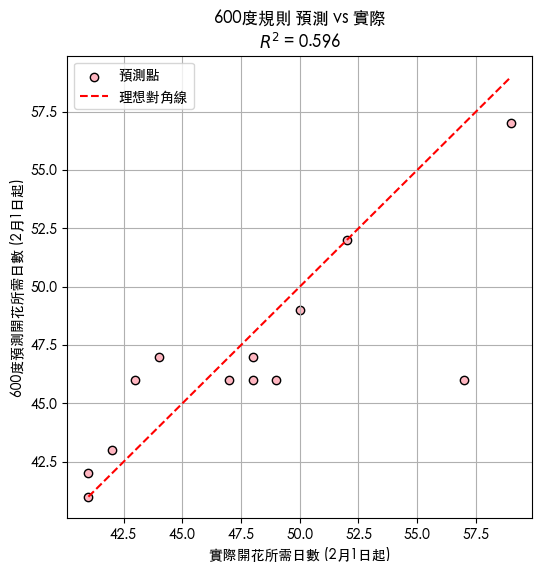

In [17]:
plt.figure(figsize=(6, 6))
plt.scatter(actual_days_from_feb1, predicted_days_600_from_feb1, color='lightpink', edgecolor='black', label='預測點')
plt.plot([actual_days_from_feb1.min(), actual_days_from_feb1.max()],
         [actual_days_from_feb1.min(), actual_days_from_feb1.max()],
         'r--', label='理想對角線')  # 理想情況：預測剛好等於實際
plt.xlabel('實際開花所需日數 (2月1日起)')
plt.ylabel('600度預測開花所需日數 (2月1日起)')
plt.title(f'600度規則 預測 vs 實際\n$R^2$ = {r2_600:.3f}')
plt.legend()
plt.grid(True)
plt.savefig('600度規則 預測 vs 實際.jpg', dpi=300, bbox_inches='tight')
plt.show()

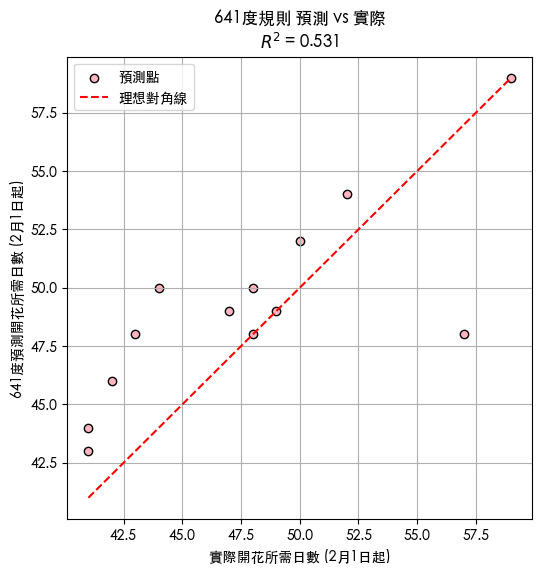

In [18]:
plt.figure(figsize=(6, 6))
plt.scatter(actual_days_from_feb1, predicted_days_641_from_feb1, color='lightpink', edgecolor='black', label='預測點')
plt.plot([actual_days_from_feb1.min(), actual_days_from_feb1.max()],
         [actual_days_from_feb1.min(), actual_days_from_feb1.max()],
         'r--', label='理想對角線')  # 理想情況：預測剛好等於實際
plt.xlabel('實際開花所需日數 (2月1日起)')
plt.ylabel('641度預測開花所需日數 (2月1日起)')
plt.title(f'641度規則 預測 vs 實際\n$R^2$ = {r2_641:.3f}')
plt.legend()
plt.grid(True)
plt.savefig('641度規則 預測 vs 實際.jpg', dpi=300, bbox_inches='tight')
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error

mse_600 = mean_squared_error(actual_days_from_feb1, predicted_days_600_from_feb1)
mse_635 = mean_squared_error(actual_days_from_feb1, predicted_days_641_from_feb1)

print(f"600度規則的 MSE：{mse_600:.2f}")
print(f"641度規則的 MSE：{mse_635:.2f}")

600度規則的 MSE：12.38
641度規則的 MSE：14.38


In [20]:
import numpy as np

rmse_600 = np.sqrt(mse_600)
rmse_635 = np.sqrt(mse_635)

print(f"600度規則 RMSE：{rmse_600:.2f} 天")
print(f"641度規則 RMSE：{rmse_635:.2f} 天")

600度規則 RMSE：3.52 天
641度規則 RMSE：3.79 天
